# movies entity

# the qeustion we need to anwser
- is there relation between budget and gross
- is there relation between company and gross
- is there relation between votes and gross
- define a business matric to measure 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4) # adjust the cinfiguration of the plots we will create

# read in the data
moviesdf = pd.read_csv(r"C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\movies_corr\dataset\movies.csv")


## show the data and understand it 

In [2]:
# see the data
moviesdf.head()
pd.set_option('display.max_row' , None)
pd.set_option('display.float_format', '{:.0f}'.format)
moviesdf['budget'].describe()

count        5497
mean     35589876
std      41457297
min          3000
25%      10000000
50%      20500000
75%      45000000
max     356000000
Name: budget, dtype: float64

# show and standariztion for the data
## note: i comment each line to improve the preformance

In [3]:
# standraize the columns
# print(moviesdf[moviesdf['name'].duplicated(keep = False)].sort_values('name' , ascending = False).head(10)) # no problem in this column
# print(moviesdf['rating'].value_counts())
# print(moviesdf['genre'].value_counts())
# print(moviesdf['released'].value_counts())
# print(moviesdf['company'].sort_values(ascending = True)) there is alot of company names not good but it won't effect the corr
# print(moviesdf[['year' , 'released' , 'country' ]].head(30))
# moviesdf[['month' , 'nn']] = moviesdf['released'].str.split(',', n=1 , expand=True )
# moviesdf = moviesdf.drop(columns = ['released' , 'nn'])
# print(moviesdf['genre'].isna().sum())
# moviesdf[['month' , 'day']] = moviesdf['month'].str.strip().str.split(' ' ,n=1 , expand = True)
moviesdf['score'] = moviesdf['score'].astype('category')
# print(moviesdf['score'].value_counts())

# print(moviesdf.head())

# handle the missing values 
## all columns are under the 5% percent except the gross field
## handle the gross filed by adding the median gross value for each genre

In [4]:
# handling the missing values
for col in moviesdf.columns:
    pct_missing = np.mean(moviesdf[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

threshold = len(moviesdf) * 0.05
col_to_drop = moviesdf.columns[moviesdf.isna().sum() <= threshold]
moviesdf.dropna(subset = col_to_drop , inplace = True)

print(moviesdf['budget'].isna().sum())
imp_col = moviesdf.groupby('genre')['budget'].median().to_dict()
moviesdf['budget'] = moviesdf['budget'].fillna(moviesdf['genre'].map(imp_col))
moviesdf.dropna(subset = 'budget' , inplace = True)
print(moviesdf['budget'].isna().sum())

for col in moviesdf.columns:
    pct_missing = np.mean(moviesdf[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
1991
0
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


# handling the outliers
## not don't remove the outliers because most of data are outliers

In [5]:
# # dealing with outliers
# q75 = moviesdf['gross'].quantile(0.25) 
# q25 = moviesdf['gross'].quantile(0.75)
# iqr = moviesdf['gross'].quantile(0.75) - moviesdf['gross'].quantile(0.25)
# lower = q25 - (1.5 * iqr)
# upper = q75 + (1.5 * iqr)
# moviesdf_c =  moviesdf[(moviesdf['gross'] <= upper) & (moviesdf['gross'] >= lower)]

In [6]:
# convert the data type
moviesdf['gross'] = moviesdf['gross'].astype('int64')
moviesdf['votes'] = moviesdf['votes'].astype('int64')
moviesdf['budget'] = moviesdf['budget'].astype('int64')
# moviesdf.dtypes
moviesdf_c = moviesdf
moviesdf_c.dtypes


name          object
rating        object
genre         object
year           int64
released      object
score       category
votes          int64
director      object
writer        object
star          object
country       object
budget         int64
gross          int64
company       object
runtime      float64
dtype: object

In [7]:
moviesdf_c.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",6,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",9,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",8,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


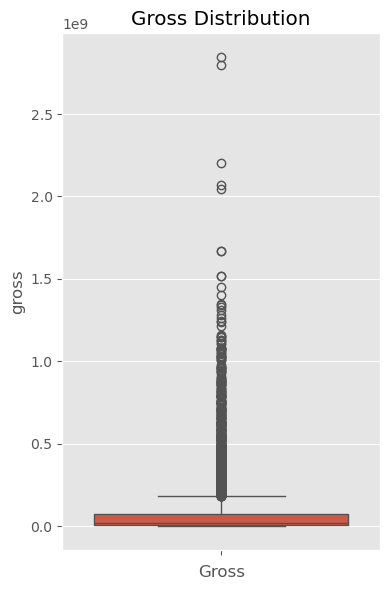

In [8]:
# show the gross distribution
plt.figure(figsize = (4 , 6))
sns.boxplot(data = moviesdf_c , y = 'gross')

plt.title('Gross Distribution')
plt.xlabel('Gross')
plt.tight_layout()
plt.show()

# the gross column is right skewed 

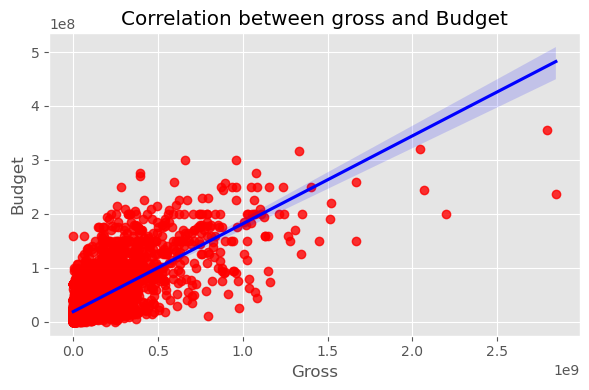

In [9]:
# the correlation between the budget and gross

sns.regplot( data = moviesdf_c , x = 'gross' , y = 'budget' , scatter_kws = {'color' : 'red'} , line_kws = {'color' : 'blue'} )

plt.title('Correlation between gross and Budget')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.tight_layout()
plt.show()

# there is a positive strong relationship between budget and gross

# correlation between category field and gross

In [10]:
# convert the company into categoies codes
moviesdf_c['company_cat'] = moviesdf_c['company'].astype('category').cat.codes

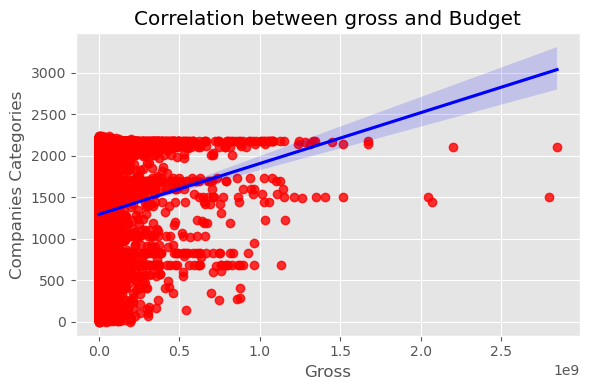

In [11]:
# the correlation between the company and gross

sns.regplot( data = moviesdf_c , x = 'gross' , y = 'company_cat' , scatter_kws = {'color' : 'red'} , line_kws = {'color' : 'blue'} )

plt.title('Correlation between gross and Budget')
plt.xlabel('Gross')
plt.ylabel('Companies Categories')
plt.tight_layout()
plt.show()

# even though it shows a positive relation but it's a very weak relation

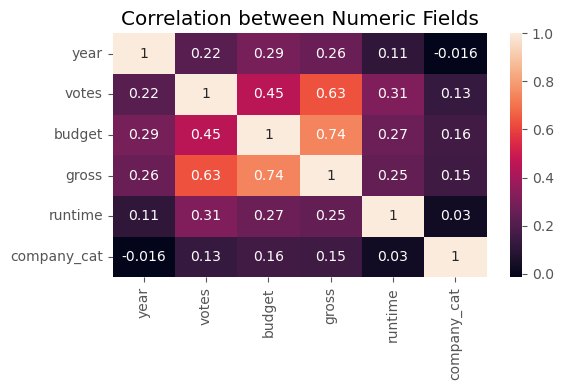

In [12]:
# corrleation matric
corr_matric = moviesdf_c.corr(numeric_only = True)

sns.heatmap(corr_matric , annot = True)
plt.title('Correlation between Numeric Fields')
plt.tight_layout()
plt.show()

# the votes is highly correlated to the gross

# Core Business Metric: Average Gross Per Genre (AGPG)
## Definition: AVERAGE revnue per each genra
## Why it matters: Measures how effectively each genre effect the revnue
## Business goal: understand which genre to invest in

In [13]:
# AGPG = Average Gross Per Genre

avg_gross_per_genre = moviesdf.groupby('genre')['gross'].mean().reset_index()
print(avg_gross_per_genre.sort_values(by = 'gross' , ascending = False))

        genre     gross
2   Animation 241356722
7      Family 215787648
0      Action 145834972
1   Adventure 109558733
10    Mystery 101183528
3   Biography  48311949
9      Horror  47836758
4      Comedy  44526756
5       Crime  39766271
8     Fantasy  39251573
6       Drama  39170965
12     Sci-Fi  32561233
13   Thriller  26935259
11    Romance  23549375
14    Western  10675295
